In [25]:
import pandas as pd
import requests
import scipy.stats as stats
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [30]:
df = pd.read_csv('/content/drive/Shareddrives/Master In Data Science/Personal Python Script/lpetrocelli-lendingclub-loan-data-2017-q-1/LoanStats_2017Q1 2.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (112) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
df['id'] = df.index

In [32]:
df_sel = df[['id','annual_inc','loan_amnt','total_rec_late_fee','delinq_2yrs','inq_last_12m','int_rate','all_util']]
percent_missing = df_sel.isnull().sum() * 100 / len(df_sel)
missing_value_df = pd.DataFrame({'column_name': df_sel.columns,
                                 'percent_missing': percent_missing})

In [ ]:
missing_value_df.loc[missing_value_df['percent_missing'] > 0 ].sort_values('percent_missing', ascending=False)

,column_name,percent_missing
all_util,all_util,0.0031


# Annual Income

In [34]:
import scipy.stats as stats
df_sel['inc_log'] = np.log(df_sel['annual_inc']+0.1)
df_sel.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,annual_inc,loan_amnt,total_rec_late_fee,delinq_2yrs,inq_last_12m,int_rate,all_util,inc_log
0,0,120000.0,3600,0.0,0,4,7.49%,39.0,11.695248
1,1,125000.0,15000,0.0,0,0,14.99%,69.0,11.736070
2,2,50000.0,8400,0.0,0,7,11.39%,65.0,10.819780
3,3,50000.0,4000,0.0,1,1,10.49%,56.0,10.819780
4,4,125000.0,6000,0.0,0,1,7.24%,83.0,11.736070


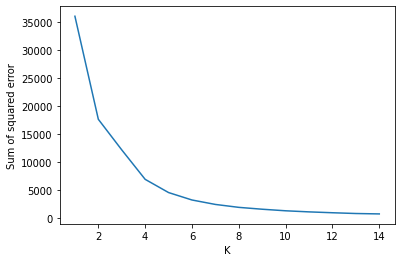

In [ ]:
from sklearn.cluster import KMeans

sse = []
k_rng = range(1,15)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_sel[['inc_log']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)  

In [50]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df_sel[['inc_log']])

df_sel['inc_cluster'] = y_predicted


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [51]:
for i in range (0,4):
  print('Cluster ' + str(i) + ': ' + str(np.median(df_sel['annual_inc'].loc[df_sel['inc_cluster'] == i])) )

Cluster 0: 135000.0
Cluster 1: 40000.0
Cluster 2: 0.0
Cluster 3: 73000.0


In [ ]:
df_sel.loc[df_sel['inc_cluster'] == 2, 'inc_score'] = 1
df_sel.loc[df_sel['inc_cluster'] == 1, 'inc_score'] = 2
df_sel.loc[df_sel['inc_cluster'] == 3, 'inc_score'] = 3
df_sel.loc[df_sel['inc_cluster'] == 0, 'inc_score'] = 4



In [54]:
df_sel.groupby(['inc_score'])['id'].count()

inc_score
1.0       33
2.0    29723
3.0    45996
4.0    21027
Name: id, dtype: int64

In [29]:
inc_log = df_sel[['inc_log']]
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(inc_log)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(inc_log, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5380752147527527
For n_clusters = 3 The average silhouette_score is : 0.5149541889873751
For n_clusters = 4 The average silhouette_score is : 0.522719289370218
For n_clusters = 5 The average silhouette_score is : 0.5192425189058957
For n_clusters = 6 The average silhouette_score is : 0.5217407235070831


# Deling

In [36]:
df_sel['deling_log'] = np.log(df_sel['delinq_2yrs']+0.1)
df_sel.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,annual_inc,loan_amnt,total_rec_late_fee,delinq_2yrs,inq_last_12m,int_rate,all_util,inc_log,deling_log
0,0,120000.0,3600,0.0,0,4,7.49%,39.0,11.695248,-2.302585
1,1,125000.0,15000,0.0,0,0,14.99%,69.0,11.736070,-2.302585
2,2,50000.0,8400,0.0,0,7,11.39%,65.0,10.819780,-2.302585
3,3,50000.0,4000,0.0,1,1,10.49%,56.0,10.819780,0.095310
4,4,125000.0,6000,0.0,0,1,7.24%,83.0,11.736070,-2.302585


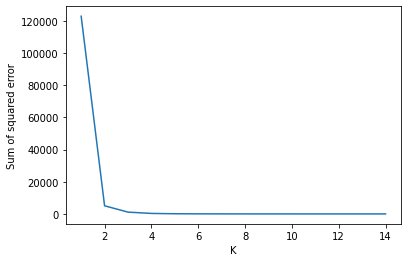

In [ ]:
from sklearn.cluster import KMeans

sse = []
k_rng = range(1,15)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_sel[['deling_log']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)  

In [ ]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df_sel[['deling_log']])

df_sel['deling_cluster'] = y_predicted


In [47]:
for i in range (0,4):
  print('Cluster ' + str(i) + ': ' + str(np.median(df_sel['delinq_2yrs'].loc[df_sel['deling_cluster'] == i])) )

Cluster 0: 0.0
Cluster 1: 1.0
Cluster 2: 5.0
Cluster 3: 2.0


In [ ]:
df_sel.loc[df_sel['deling_cluster'] == 2, 'deling_score'] = 1
df_sel.loc[df_sel['deling_cluster'] == 3, 'deling_score'] = 2
df_sel.loc[df_sel['deling_cluster'] == 1, 'deling_score'] = 3
df_sel.loc[df_sel['deling_cluster'] == 0, 'deling_score'] = 4


In [49]:
df_sel.groupby(['deling_score'])['id'].count()

deling_score
1.0     1538
2.0     5383
3.0    13217
4.0    76641
Name: id, dtype: int64

In [38]:
deling_log = df_sel[['deling_log']]
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(deling_log)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(deling_log, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.9663010087578521
For n_clusters = 3 The average silhouette_score is : 0.9701166989172275
For n_clusters = 4 The average silhouette_score is : 0.979633039646386
For n_clusters = 5 The average silhouette_score is : 0.9895882575078391
For n_clusters = 6 The average silhouette_score is : 0.994066957161959


# Credit Limit Utilization Rate

In [39]:
df_sel['all_util'].fillna(df_sel['all_util'].median(), inplace=True)
df_sel['util_log'] = np.log(df_sel['all_util']+0.1)
df_sel.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,annual_inc,loan_amnt,total_rec_late_fee,delinq_2yrs,inq_last_12m,int_rate,all_util,inc_log,deling_log,util_log
0,0,120000.0,3600,0.0,0,4,7.49%,39.0,11.695248,-2.302585,3.666122
1,1,125000.0,15000,0.0,0,0,14.99%,69.0,11.736070,-2.302585,4.235555
2,2,50000.0,8400,0.0,0,7,11.39%,65.0,10.819780,-2.302585,4.175925
3,3,50000.0,4000,0.0,1,1,10.49%,56.0,10.819780,0.095310,4.027136
4,4,125000.0,6000,0.0,0,1,7.24%,83.0,11.736070,-2.302585,4.420045


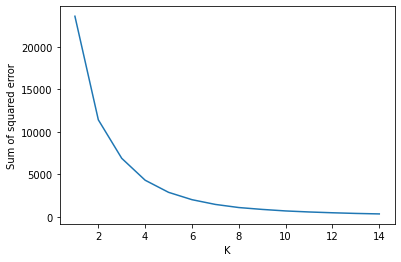

In [ ]:
from sklearn.cluster import KMeans

sse = []
k_rng = range(1,15)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_sel[['util_log']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)  

In [41]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_sel[['util_log']])

df_sel['util_cluster'] = y_predicted


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [42]:
for i in range (0,3):
  print('Cluster ' + str(i) + ': ' + str(np.median(df_sel['all_util'].loc[df_sel['util_cluster'] == i])) )

Cluster 0: 67.0
Cluster 1: 10.0
Cluster 2: 38.0


In [ ]:
df_sel.loc[df_sel['util_cluster'] == 0, 'util_score'] = 1
df_sel.loc[df_sel['util_cluster'] == 2, 'util_score'] = 2
df_sel.loc[df_sel['util_cluster'] == 1, 'util_score'] = 3



In [44]:
df_sel.groupby(['util_score'])['id'].count()

util_score
1.0    67295
2.0    27499
3.0     1985
Name: id, dtype: int64

In [40]:
util_log = df_sel[['util_log']]
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(util_log)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(util_log, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.6373776996383936
For n_clusters = 3 The average silhouette_score is : 0.5836325634512676
For n_clusters = 4 The average silhouette_score is : 0.5504771204577789
For n_clusters = 5 The average silhouette_score is : 0.5395600490865987
For n_clusters = 6 The average silhouette_score is : 0.53198346558212


In [55]:
df_sel.head()

,id,annual_inc,loan_amnt,total_rec_late_fee,delinq_2yrs,inq_last_12m,int_rate,all_util,inc_log,deling_log,util_log,util_cluster,util_score,deling_cluster,deling_score,inc_cluster,inc_score
0,0,120000.0,3600,0.0,0,4,7.49%,39.0,11.695248,-2.302585,3.666122,2,2.0,0,4.0,0,4.0
1,1,125000.0,15000,0.0,0,0,14.99%,69.0,11.736070,-2.302585,4.235555,0,1.0,0,4.0,0,4.0
2,2,50000.0,8400,0.0,0,7,11.39%,65.0,10.819780,-2.302585,4.175925,0,1.0,0,4.0,1,2.0
3,3,50000.0,4000,0.0,1,1,10.49%,56.0,10.819780,0.095310,4.027136,0,1.0,1,3.0,1,2.0
4,4,125000.0,6000,0.0,0,1,7.24%,83.0,11.736070,-2.302585,4.420045,0,1.0,0,4.0,0,4.0


In [57]:
df_sel.to_csv('/content/drive/Shareddrives/Master In Data Science/Personal Python Script/lpetrocelli-lendingclub-loan-data-2017-q-1/customer_score.csv', index=False)

# Customer Segmentation

In [6]:
pd_score = pd.read_csv('/content/drive/Shareddrives/Master In Data Science/Personal Python Script/lpetrocelli-lendingclub-loan-data-2017-q-1/customer_score.csv')

In [ ]:
pd_score.head()

,id,annual_inc,loan_amnt,total_rec_late_fee,delinq_2yrs,inq_last_12m,int_rate,all_util,inc_log,inc_cluster,rev_score,inc_score,deling_log,deling_cluster,deling_score,loan_log,loan_cluster,util_log,util_cluster,util_score
0,0,120000.0,3600,0.0,0,4,7.49%,39.0,11.695248,2,3.0,3.0,-2.302585,0,3.0,8.188717,3,3.666122,3,1.0
1,1,125000.0,15000,0.0,0,0,14.99%,69.0,11.736070,2,3.0,3.0,-2.302585,0,3.0,9.615812,0,4.235555,0,0.0
2,2,50000.0,8400,0.0,0,7,11.39%,65.0,10.819780,1,1.0,1.0,-2.302585,0,3.0,9.035999,1,4.175925,0,0.0
3,3,50000.0,4000,0.0,1,1,10.49%,56.0,10.819780,1,1.0,1.0,0.095310,1,2.0,8.294075,1,4.027136,3,1.0
4,4,125000.0,6000,0.0,0,1,7.24%,83.0,11.736070,2,3.0,3.0,-2.302585,0,3.0,8.699531,1,4.420045,0,0.0


In [56]:
#df_score = pd_score[['id','inc_score','deling_score','util_score']]
df_score = df_sel[['id','inc_score','deling_score','util_score']] 

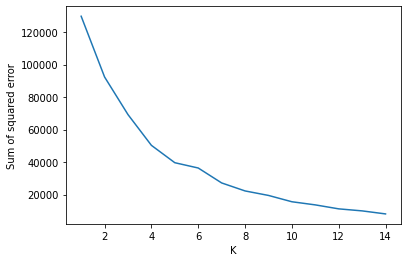

In [ ]:
sse = []
k_rng = range(1,15)
for k in k_rng:
    km = KMeans(n_clusters=k)
    #km.fit(history_set_concat[['close_z','volume_z', 'max_close_30_%' ,'50_ma_var','100_ma_var', '50_100_ma_var', 'previous close_var', 'previous_close_var_2', 'previous_close_var_3', 'previous_close_var_4',
    #   'previous_close_var_5', 'open_var']])
    km.fit(df_score[['inc_score','deling_score','util_score']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [58]:
col = df_sel[['id','inc_score','deling_score','util_score']] 
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(col)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(col, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.6267261744213625
For n_clusters = 3 The average silhouette_score is : 0.5901791008182806
For n_clusters = 4 The average silhouette_score is : 0.5719045352863484
For n_clusters = 5 The average silhouette_score is : 0.5610198544058579
For n_clusters = 6 The average silhouette_score is : 0.5538048015028536
For n_clusters = 7 The average silhouette_score is : 0.5486230055992504


In [63]:
km = KMeans(n_clusters=4)
score_predicted = km.fit_predict(df_score[['inc_score','deling_score','util_score']])
df_score['score_cluster'] = score_predicted
df_score['final_score'] = df_score['inc_score'] + df_score['deling_score'] + df_score['util_score']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [66]:
df_score.groupby(['score_cluster'])['final_score','inc_score','deling_score','util_score'].mean().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,score_cluster,final_score,inc_score,deling_score,util_score
0,0,8.158923,3.314517,3.844406,1.000000
1,1,6.120503,3.014738,1.777778,1.327987
2,2,7.193987,1.998830,3.877880,1.317277
3,3,9.188367,3.252798,3.836324,2.099245


In [67]:
df_score.groupby(['score_cluster'])['id'].count()

score_cluster
0    43845
1     6921
2    27342
3    18671
Name: id, dtype: int64

In [68]:
df_score.head()

,id,inc_score,deling_score,util_score,score_cluster,final_score
0,0,4.0,4.0,2.0,3,10.0
1,1,4.0,4.0,1.0,0,9.0
2,2,2.0,4.0,1.0,2,7.0
3,3,2.0,3.0,1.0,2,6.0
4,4,4.0,4.0,1.0,0,9.0


In [69]:
df_score.to_csv('/content/drive/Shareddrives/Master In Data Science/Personal Python Script/lpetrocelli-lendingclub-loan-data-2017-q-1/customer_segment.csv', index=False)

## Classification

In [70]:
df_score = pd.read_csv('/content/drive/Shareddrives/Master In Data Science/Personal Python Script/lpetrocelli-lendingclub-loan-data-2017-q-1/customer_segment.csv')
df_class = pd.merge(df_score, pd_score, how="left", on=["id"])

In [71]:
dfx = df_class[['annual_inc','delinq_2yrs','all_util']]
dfy = df_class['score_cluster']  

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.30, random_state=0)

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search__rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [82]:
rf = RandomForestClassifier().fit(X_train, y_train)
#grid_search__rf.fit(X_train, y_train)

In [89]:
import pickle
filename = '/content/drive/Shareddrives/Master In Data Science/Personal Python Script/lpetrocelli-lendingclub-loan-data-2017-q-1/customer_segmentation.sav'
pickle.dump(rf, open(filename, 'wb'))

In [85]:
from sklearn.metrics import confusion_matrix
x_pred = rf.predict(X_train)
#x_pred = grid_search__rf.predict(X_train)
cfm = confusion_matrix(y_train.tolist(), x_pred )
print(cfm)

[[30686     0     0     0]
 [    0  4853     0     0]
 [    0     0 19138     0]
 [    0     0     0 13068]]


In [90]:
y_pred = rf.predict(X_test)
#y_pred = grid_search__rf.predict(X_test)
cfm = confusion_matrix(y_test.tolist(), y_pred )
print(cfm)

[[13159     0     0     0]
 [    0  2068     0     0]
 [    0     0  8204     0]
 [    0     0     0  5603]]


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13159
           1       1.00      1.00      1.00      2068
           2       1.00      1.00      1.00      8204
           3       1.00      1.00      1.00      5603

    accuracy                           1.00     29034
   macro avg       1.00      1.00      1.00     29034
weighted avg       1.00      1.00      1.00     29034



In [93]:
X_test['score_cluster'] = y_test
X_test['pred_cluster'] =  y_pred
X_test.head(15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,annual_inc,delinq_2yrs,all_util,score_cluster,pred_cluster
94619,48000.0,0,57.0,2,2
51450,75000.0,1,103.0,0,0
89242,100000.0,1,62.0,0,0
90175,75000.0,0,88.0,0,0
7655,85000.0,0,55.0,0,0
19768,62000.0,0,11.0,3,3
70279,56000.0,0,76.0,0,0
41761,150000.0,0,74.0,0,0
87328,35000.0,0,26.0,2,2
69633,26000.0,0,70.0,2,2


In [88]:
df_class.head()

,id,inc_score_x,deling_score_x,util_score_x,score_cluster,final_score,annual_inc,loan_amnt,total_rec_late_fee,delinq_2yrs,inq_last_12m,int_rate,all_util,inc_log,inc_cluster,rev_score,inc_score_y,deling_log,deling_cluster,deling_score_y,loan_log,loan_cluster,util_log,util_cluster,util_score_y
0,0,4.0,4.0,2.0,3,10.0,120000.0,3600,0.0,0,4,7.49%,39.0,11.695248,2,3.0,3.0,-2.302585,0,3.0,8.188717,3,3.666122,3,1.0
1,1,4.0,4.0,1.0,0,9.0,125000.0,15000,0.0,0,0,14.99%,69.0,11.736070,2,3.0,3.0,-2.302585,0,3.0,9.615812,0,4.235555,0,0.0
2,2,2.0,4.0,1.0,2,7.0,50000.0,8400,0.0,0,7,11.39%,65.0,10.819780,1,1.0,1.0,-2.302585,0,3.0,9.035999,1,4.175925,0,0.0
3,3,2.0,3.0,1.0,2,6.0,50000.0,4000,0.0,1,1,10.49%,56.0,10.819780,1,1.0,1.0,0.095310,1,2.0,8.294075,1,4.027136,3,1.0
4,4,4.0,4.0,1.0,0,9.0,125000.0,6000,0.0,0,1,7.24%,83.0,11.736070,2,3.0,3.0,-2.302585,0,3.0,8.699531,1,4.420045,0,0.0
